In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline              

# Формальная постановка

<table><tr>
<td><img src="images_pt1/class1.png" style="height:400px"></td>
<td><img src="images_pt1/class2.png" style="height:400px"></td>
</tr></table>

Дан набор обучающих примеров $$(x_1, x_2, \dots, x_n), x_i \in \mathcal{X} \subseteq \mathbb{R}^k,$$ $n$ -- размер выборки, $k$ -- количество признаков (фичей). Также задан набор целевых переменных $$(y_1, y_2, \dots, y_n), y_i \in \mathcal{Y} \subseteq \mathbb{R}.$$

Наша задача построить алгоритм
$$a: \mathcal{X} \to \mathcal{Y},$$
который будет приближать исходную зависимость $f$.

## Задача классификации
Множество $\mathcal{Y}$ конечно.

Частный случай -- бинарная классификация ($|\mathcal{Y}| = 2$), например, предсказываем будет ли клик, покупка.

## Логистическая регрессия

<img src="images_pt1/class3.png" style="height:400px">

Нам надо найти уравнение прямой (гиперплоскости), которая бы могла разделить два класса ($H_2$ и $H_3$ подходят). В данном случае, уравнение прямой задаётся как: $$g(x) = w_0 + w_1x[1] + w_2x[2] = \langle w, x \rangle + w_0 =  w^\top x + w_0$$

* Если $g(x^*) > 0$, то $y^* = \text{'черный'} = 1$
* Если $g(x^*) < 0$, то $y^* = \text{'белый'} = 0$
* Если $g(x^*) = 0$, то мы находимся на линии
* т.е. решающее правило: $y^* = 
\begin{cases}
1, &\text{если } g(x^*) > 0,\\
0, &\text{если } g(x^*) < 0.
\end{cases}$

Некоторые геометрические особенности
* $\frac{w_0}{||w||}$ - расстояние от начала координат то прямой
* $\frac{|g(x)|}{||w||}$ - расстояние от точки $x$ до гиперплоскости, степень "уверенности" в классификациий


Отлично! Значит нам надо просто минимизировать ошибки классификации для всех объектов:

$$L(w) = \sum_{i: y_i = 0} [g(x_i) > 0] + \sum_{i: y_i = 1} [g(x_i) < 0] \rightarrow \min_w$$

Проблема в том, что это будет комбинаторная оптимизация. Существуют различные аппроксимации этой функции ошибок:
<center><img src='http://jaquesgrobler.github.io/Online-Scikit-Learn-stat-tut/_images/plot_sgd_loss_functions_11.png'></center>

Рассмотрим функцию $$\sigma(z) = \frac{1}{1 + exp{(-z)}},$$она называется **сигмойда**. 

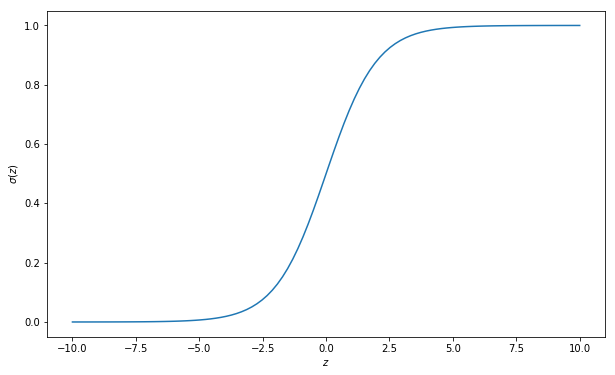

In [2]:
def demo_sigmoid():
    z = np.linspace(-10, 10, 100)

    y = sigmoid(z)
    plt.figure(figsize=(10,6))
    plt.plot(z, y)
    plt.xlabel('$z$')
    plt.ylabel('$\sigma(z)$')
    
def sigmoid(z): 
    return 1./(1+np.exp(-z))
demo_sigmoid() 

<img src="images_pt1/prob.png" style="height:500px">

#### Постановка задачи
Будем требовать, чтобы алгоритм возвращал вероятность класса $y=1$:
$$h(x,w) = p(y=1|x,w) = \sigma(g(x))$$

Выпишем функцию правдоподобия
$$ \mathcal{L}(w) = \prod_{i=1}^n h(x_i,w)^{[y_i = 1]} (1 - h(x_i,w))^{[y_i = 0]} \rightarrow \max_w$$
$$ -\log{\mathcal{L}(w)} = - \sum_i^n [y_i = 1]\cdot\log{(h(x_i,w))} + {[y_i = 0]}\cdot\log{(1-h(x_i,w))} \rightarrow \min_w$$
$$L(w) = -\log{\mathcal{L}(w)} \rightarrow \min_w $$

Алгоритм $h$ называется ***логистической регрессией***.

Одна из основных функций потерь -- ***Log Loss*** (бинарная классификация), которую мы получили при выводе логрегрессии:
$$L = -\sum_{i=1}^n(\,\,y_i \cdot \log{a(x_i)} + (1 - y_i) \cdot \log(1 - a(x_i))\,\,).$$

### Случай нескольких классов (>2)

* А если классов несколько?
    * 1-vs-1
    * 1-vs-rest
    * Softmax 

## Softmax

Для каждого класса определяется свой набор весов

$$
\begin{cases}
g_1(x)=w_{1}^{T}x + w_{0,1} \\
g_{2}(x)=w_{2}^{T}x + w_{0,2}\\
\cdots\\
g_{C}(x)=w_{C}^{T}x + + w_{0,C}
\end{cases}
$$

Нормировка "скоров" классов

$$
p(y=c|x)=softmax(g_c|W, x)=\frac{exp(w_{c}^{T}x + w_{0,c})}{\sum_{i}exp(w_{i}^{T}x + w_{0,i})}
$$



***Cross Entropy Loss*** (общий случай Log Loss), который мы можем вывести по аналогии с Log Loss:
$$L = -\sum_{i=1}^n <y_i , \log{a(x_i)}>.$$

Здесь $y_i$ и $a(x_i)$ -- вектора размерности $|\mathcal{Y}|$, у $y_i$ только в одной позиции 1, в остальных -- 0.

## Метод ближайших соседей

### K-Nearest Neighbours

$$
h(x) = \frac{1}{n} \sum_{x_j \in N_K(x)} f(x_j).
$$

$N_K(\mathbf{x})$ -- $K$ ближайших соседей для вектора $x$ в обучающем наборе (то есть среди $x_1, ... , x_n$).

Как можно использовать для бинарной классификации? А когда классов > 2?

## Байесовский наивный классификатор (Naive Bayes)

Дано:

$x \in \mathcal{X}$ - вектор признаков. Наивность алгоритма характеризуется предположением о том, что компоненты вектора $x$ являются **независимыми** между собой случайными величинами.

$C_k \in \mathcal{Y}, \; k = 1,\ldots,|\mathcal{Y}|$ - целевая переменная (класс).

Теорема Байеса
$$
P(C_k \mid x) = \frac{p(x \mid C_k) p(C_k)}{p(x)} \propto p(x \mid C_k) p(C_k).
$$

Из независимости компонент $x$:
$$p(x \mid C_k) = \prod_j p_j(x[j] \mid C_k).$$

Таким образом обучение состоит в оценке плотностей $p_j(x[j] \mid C_k), p(C_k)$.

Предсказание производится с помощью принципа Maximum A-Posteriori:
$$
C_{MAP} = \arg \max_k p(C_k \mid x) = \arg \max_k p(C_k)\prod_j p_j(x[j] \mid C_k).
$$

Байесовский классификатор — широкий класс алгоритмов классификации, основанный на принципе максимума апостериорной вероятности.  
Для классифицируемого объекта вычисляются функции правдоподобия каждого из классов, по ним вычисляются апостериорные вероятности классов.  
Объект относится к тому классу, для которого апостериорная вероятность максимальна.

## Задача

|d | Текст | Класс |
|--|--|--|
|1 | котики такие мокрые | мимими |
|2 | пушистые котики няшки | мимими |
|3 | морские котики  | не мимими |
|4 | мокрые морские свинки | не мимими |
|5 | котики мокрые | ???|

С помощью алгоритма MultinomialNB (считаем токены) вычислить $p(\text{мимими} | d_5)$

Что еще есть: SVM, SVM + kernel trick, Neural Networks

### Метрики качества

<table><tr>
<td><img src="images_pt1/prec1.png" style="height:400px"></td>
<td><img src="images_pt1/prec2.png" style="height:400px"></td>
</tr></table>

$$Accuracy = \frac{1}{n}\sum_{i=1}^n [a(x_i) = y_i]$$

$$Precision = \sum_{i=1}^n \frac{[a(x_i) = y_i = 1]}{[a(x_i) = 1]}$$

$$Recall = \sum_{i=1}^n \frac{[a(x_i) = y_i = 1]}{[y_i = 1]}$$

### F мера

$$F1 = 2 \cdot \frac{Recall \cdot Precision}{Recall + Precision}.$$

$$F_\beta = (1 + \beta^2) \cdot \frac{Recall \cdot Precision}{Recall + \beta^2 \cdot Precision}.$$

$$F_\beta = \left({\frac {\alpha }{Precision}}+{\frac {1-\alpha }{Recall}}\right)^{-1}, \,\,
\alpha ={\frac {1}{1+\beta ^{2}}}.$$

`Measures the effectiveness of retrieval with respect to a user who attaches β times as much importance to recall as precision.` ([wiki](https://en.wikipedia.org/wiki/F1_score))

При $\beta \to \infty$ получаем $F_\beta \to Recall$.

При $\beta \to 0$ получаем $F_\beta \to Precision$.

### ROC-AUC

Для задачи бинарной классификации алгоритм $a$ может выдавать не просто метку из $\mathcal{Y}$, а некоторое число (скор, вероятность). Чтобы сказать какая метка будет на выходе алгоритма используют порог $\alpha$ так, что:

$$\hat{y}_i =
	 \begin{cases}{}
	 	1, &\text{если } a(x_i) \geq \alpha, \\
	 	0, &\text{если } a(x_i) < \alpha.
	 \end{cases}$$

<img src="images_pt1/tp_fp.png" style="height:300px">

В зависимости от этого порога у нас будут получаться разные предсказания на одних и тех же данных. Следовательно и метрики качества, определенные выше, будут разные. Определим следующие величины:

$$TPR = \frac{TP}{TP+FN}, \,\, FPR = \frac{FP}{FP+TN}.$$

Для разных значений порога $-\infty < \alpha < +\infty$ посчитает значения TPR (True Positive Rate) и FPR (False Positive Rate) и отложим их на графике:

<img src="images_pt1/roc_auc.png" style="height:400px">

Площадь под графиком и является метрикой ROC-AUC.

#### Интерпретация через непрерывные случайные величины:

<img src="images_pt1/roc_auc_interpret.png" style="height:400px">

### PR-AUC
По аналогии с ROC-AUC, только по осям у нас Precision и Recall.

<img src="images_pt1/pr_auc.png" style="height:400px">

### KL divergence (Расстояние Кульбака — Лейблера)

$$D_{KL}(P\parallel Q)=\sum \limits _{i=1}^{n}p_{i}\log {\frac {p_{i}}{q_{i}}}.$$

## Appendix (SVM)

<img src="images_pt1/class3.png" style="height:400px">

Уравнение прямой задаётся как: $$g(x) = w_0 + w_1x_1 + w_2x_2 = w_0 + \langle w, x \rangle = w_0 +  w^\top x $$

* Если $g(x^*) > 0$, то $y^* = \text{'черный'} = +1$
* Если $g(x^*) < 0$, то $y^* = \text{'белый'} = -1$ (немного поменяем обозначения для простоты изложения)
* Если $g(x^*) = 0$, то мы находимся на линии
* т.е. решающее правило: $y^* = sign(g(x^*))$

Некоторые геометрические особенности
* $\frac{|g(x)|}{||w||}$ - расстояние от точки $x$ до гиперплоскости, степень "уверенности" в классификациий
* Величину $M = y(\langle w, x \rangle + w_0) = y \cdot g(x)$ называют **отступом**(margin)

Если для какого-то объекта $M \geq 0$, то его классификация выполнена успешно.

###  Линейноразделимый случай с двумя классами
* Заметим что $g(x) = w_0 + \langle w, x \rangle$ и $g'(x) = c \cdot (w_0 + \langle w, x \rangle)$, $\forall c>0$ задают одну и ту же гиперплоскость
* Подберем $c$ таким образом, чтобы $\min\limits_i M_i = \min\limits_i y \cdot g(x_i) = 1$

<center><img src='./images_pt1/margin.png'></center>

* Таким образом выполняются следующие неравенства:
    * $w_0 + \langle w, x_i \rangle \geq 1$, если $y_i = + 1$
    * $w_0 + \langle w, x_i \rangle \leq - 1$, если $y_i = - 1$

* Разделяющая полоса:  $ -1 \leq w_0 + \langle w, x \rangle \leq +1$
* Ширина разделяющей полосы:
 $$\langle (x_{+} -  x_{-}) , \frac{w}{||w||}\rangle = \frac{\langle w, x_{+} \rangle - \langle w, x_{-} \rangle }{||w||} = \frac{2}{||w||}  \rightarrow \max$$
 
 
* Таким образом мы придем к оптимизационной задаче:
$$
\begin{cases} 
   \frac{1}{2} ||w||^2  \rightarrow \min  \\
   y^{(i)}(\langle w, x^{(i)} \rangle + w_0 ) \geq 1 \quad i=1\dots n
\end{cases}
$$

По теореме Куна-Таккера:


$$\begin{cases} 
   \mathcal{L}(w,w_0,\lambda) = \frac{1}{2} ||w||^2  - \sum\limits_i \lambda_i \left( y^{(i)}(\langle w, x \rangle + w_0 )  - 1\right)  \rightarrow \min\limits_{w,w_0}\max\limits_{\lambda}  \\
   \lambda_i \geq 0 \quad i=1\dots n\\
   \lambda_i = 0 \text{, либо }  \langle w, x^{(i)} \rangle + w_0 = y^{(i)} \quad i=1\dots n
\end{cases}$$
Объекты, для которых  $\lambda_i \neq 0$ называются ** опорными ** 


Необходимое условие:
*  $\frac{\partial \mathcal{L} }{\partial w} = w - \sum\limits_i \lambda_iy_ix_i = 0 \quad \Rightarrow  \quad w = \sum\limits_i \lambda_iy_ix_i$
*  $\frac{\partial \mathcal{L} }{\partial w_0} = \sum\limits_i \lambda_iy_i = 0$

(Сопряжённая задача) Если подставить  эти результаты в $\mathcal{L}$ то получится
$$\begin{cases}
\mathcal{L}(\lambda) = \sum\limits_i\lambda_i  - \frac{1}{2} \sum\limits_i\sum\limits_j \lambda_i \lambda_j  y_i y_j (\langle x_i, x_j \rangle)  \rightarrow \max\limits_\lambda  \\
\lambda_i \geq 0 \quad i=1\dots n \\
\sum\limits_i \lambda_iy_i = 0
\end{cases}$$

* **Зависит не от самих объектов, а от их скалярного произведения! **
* $\mathcal{L}(\lambda)$ - выпуклая и ограниченная сверху функция.
* Имеем единственное решение при линейной разделимости
* Находим $\lambda_i,$ из $w = \sum\limits_i \lambda_iy_ix_i$ находим коэффициенты $w$.
* Свободный член $w_0$ определяется как среднее или медиана $\{\langle w, x_i \rangle - y_i: \lambda_i \neq 0\}$

In [3]:
from sklearn.datasets.samples_generator import make_classification

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print('Так надо')

def plot_svc_log_decision_function(clf1, clf2, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    XX, YY = np.meshgrid(x, y)
    XY = np.c_[XX.ravel(), YY.ravel()]
    P1 = clf1.decision_function(XY)
    P1 = P1.reshape(XX.shape)
    
    P2 = clf2.decision_function(XY)
    P2 = P2.reshape(XX.shape)
    # plot the margins
    cplot = ax.contour(XX, YY, P1, colors='k', label='svm',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.clabel(cplot, inline=1, fontsize=10)
    
    ax.contour(XX, YY, P2, colors='r', label='logreg',
               levels=[0], alpha=0.5,
               linestyles=['-'])

    
def plot_svc_decision_function(clf1, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    XX, YY = np.meshgrid(x, y)
    XY = np.c_[XX.ravel(), YY.ravel()]
    P1 = clf1.decision_function(XY)
    P1 = P1.reshape(XX.shape)
    
    # plot the margins
    cplot = ax.contour(XX, YY, P1, colors='k', label='svm',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.clabel(cplot, inline=1, fontsize=10)
    

def lin_sep_svm_demo(class_sep=2):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=class_sep, scale=1,
                                n_redundant=0, n_clusters_per_class=1, random_state=31)
    # x_line = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5)

    lin_svm = SVC(kernel='linear', C=100).fit(X, y)
    
    log_reg = LogisticRegression(C=100).fit(X, y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
    plot_svc_log_decision_function(lin_svm, log_reg)
    # plt.scatter(lin_svm.support_vectors_[:, 0], lin_svm.support_vectors_[:, 1],
    #        s=200, facecolors='none')
    
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    plt.xlim(-2, 5)
    plt.ylim(-3, 4)

In [4]:
interact(lin_sep_svm_demo, class_sep=FloatSlider(min=0.4, max=4, step=0.1, value=2))

interactive(children=(FloatSlider(value=2.0, description='class_sep', max=4.0, min=0.4), Output()), _dom_class…

<function __main__.lin_sep_svm_demo(class_sep=2)>

### Неразделимый случай 

Будем допускать пропуск объектов за разделительную линию
* Вместо условия $y^{(i)}(\langle w, x^{(i)} \rangle + w_0 ) \geq 1$
* Будет условие $y^{(i)}(\langle w, x^{(i)} \rangle + w_0 ) \geq 1 - \xi_i, \quad \xi_i \geq 0$

<center><img src='./images_pt1/slack.png'></center>

А целевой функционал заменим на 

$$ \frac{1}{2} ||w||^2 + C\sum\limits_i\xi_i  \rightarrow \min\limits_{w,w_0,\xi}  $$

Таким образом мы придем к оптимизационной задаче:
$$
\begin{cases} 
   \frac{1}{2} ||w||^2 + C\sum\limits_i\xi_i  \rightarrow \min\limits_{w,w_0,\xi} \\
   y^{(i)}(\langle w, x^{(i)} \rangle + w_0 ) \geq 1 - \xi_i \quad i=1\dots n \\
   \xi_i \geq 0 \quad i=1\dots n
\end{cases}
$$



Условия Куна-Таккера, необходимые условия оптимума $\rightarrow$ получаем сопряженную задачу
$$\begin{cases}
\mathcal{L}(\lambda) = \sum\limits_i\lambda_i  - \frac{1}{2} \sum\limits_i\sum\limits_j \lambda_i \lambda_j  y_i y_j (\langle x_i, x_j \rangle)  \rightarrow \max\limits_\lambda  \\
0 \leq \lambda_i \leq C \quad i=1\dots n \\
\sum\limits_i \lambda_iy_i = 0
\end{cases}$$

Заметим, что изначальный целевой функционал
$$ \frac{1}{2} ||w||^2 + C\sum\limits_i\xi_i  \rightarrow \min\limits_{w,w_0,\xi}  $$
Можно представить в виде
$$ \frac{1}{2С} ||w||^2 + \sum\limits_i(1-M_i)_+ \rightarrow \min\limits_{w,w_0}, $$
где $M_i$ - это отступ объекта  $x^{(i)}$

In [5]:
def lin_sep_svm_demo_C(class_sep=2, C=10):
    X, y = make_classification(n_samples=100, n_features=2, n_informative=2, class_sep=class_sep, scale=1,
                                n_redundant=0, n_clusters_per_class=1, random_state=31)
    # x_line = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5)

    lin_svm = SVC(kernel='linear', C=C).fit(X, y)
    
    log_reg = LogisticRegression(C=C).fit(X, y)
    
    plt.figure(figsize=(10,7))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap='autumn')
    plot_svc_log_decision_function(lin_svm, log_reg)
    plt.scatter(lin_svm.support_vectors_[:, 0], lin_svm.support_vectors_[:, 1],
            s=200, facecolors='none')
    
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    plt.xlim(-2, 5)
    plt.ylim(-3, 4)

In [6]:
interact(lin_sep_svm_demo_C, class_sep=FloatSlider(min=0.2, max=4, value=2, step=0.2), C=FloatSlider(min=0.002, max=10, step=0.002, value=1))

interactive(children=(FloatSlider(value=2.0, description='class_sep', max=4.0, min=0.2, step=0.2), FloatSlider…

<function __main__.lin_sep_svm_demo_C(class_sep=2, C=10)>

Еще есть kernel trick -- делаем преобразование пространства так, что в новом пространстве классы линейно разделимы.